En primer lugar vamos a importar tensorflow y vamos a comprobar su versión

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


Ahora, vamos a importar keras y a ver su versión

In [2]:
from tensorflow import keras
print(keras.__version__)

2.4.0


**Construcción de una clasificador de imagenes utilizando una API secuencial**

vamos a cargar ahora uno de los dataset de entrenamiento de keras, el reconocimiento de los digitos

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Vamos a ver el tamaño del dataset, y el tamaño de la imagen

In [4]:
X_train_full.shape

(60000, 28, 28)

Aqui comprobamos el tipo de dato 

In [5]:
X_train_full.dtype

dtype('uint8')

Un poco de pretratamiento de los datos, en este caso como vamos a usar el gradient descent, necesitamos reescalar los datos a 0-1

In [6]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Le damos un nombre a cada una de las clases

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

**Creación del modelo usando una API secuencial**

In [8]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

otra forma de hacer esta misma operación de añadir capas:


In [9]:
# model= keras.models.Sequential([]
#    keras.layers.Flatten(input_shape=[28,28])
#    keras.layers.Dense(300, activation="relu")
#    keras.layers.Dense(300, activation="relu")
#    keras.layers.Dense(10, activation="softmax")
#])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


Vamos ahora a ver las capas

In [11]:
model.layers

algunas operaciones y comando interesantes

In [12]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [13]:
model.get_layer('dense_2') is hidden1

False

Todos los parametros de una capa estan accesibles utilizando "get_weights()" y "set_weights()"

In [14]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0689991 ,  0.05501328,  0.00012292, ..., -0.04058291,
         0.0711264 ,  0.03787729],
       [ 0.00432165, -0.028391  , -0.00049402, ...,  0.06930728,
         0.00352959,  0.02645512],
       [ 0.07163736, -0.04609925,  0.02805723, ..., -0.00995123,
         0.07303764, -0.02733178],
       ...,
       [ 0.04266412,  0.01117394,  0.05706964, ..., -0.05974182,
        -0.0722113 , -0.04868867],
       [-0.06981216, -0.07041334, -0.07375884, ..., -0.04082254,
         0.07117391,  0.00120211],
       [-0.00359699, -0.05792072,  0.05182554, ..., -0.02189864,
         0.00626783, -0.07181527]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

**Compilando el modelo**

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

**Entrenando y evaluando el modelo**

In [19]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0155 - accuracy: 0.6828 - val_loss: 0.5399 - val_accuracy: 0.8158
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5036 - accuracy: 0.8267 - val_loss: 0.4507 - val_accuracy: 0.8474
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4571 - accuracy: 0.8397 - val_loss: 0.4332 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4168 - accuracy: 0.8537 - val_loss: 0.4342 - val_accuracy: 0.8476
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4024 - accuracy: 0.8570 - val_loss: 0.3872 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3818 - accuracy: 0.8659 - val_loss: 0.3819 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3724 - accuracy: 0.8688 - val_loss: 0.3850 - val_accuracy:

Ahora vamos a comprobar las variables loss, accuracy, validation_loss y validation_accuracy

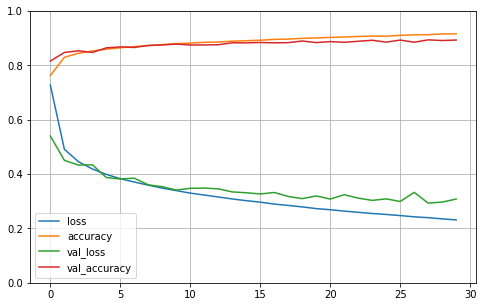

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Fijaros que las curvas training accuracy y validation accuracy  se van incrementando durante el entrenamiento, mientras que las loss se hacen mas pequeñas

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 71.7711 - accuracy: 0.8399


[71.77110290527344, 0.839900016784668]